   year  month carrier       carrier_name airport  \
0  2020     12      9E  Endeavor Air Inc.     ABE   
1  2020     12      9E  Endeavor Air Inc.     ABY   
2  2020     12      9E  Endeavor Air Inc.     AEX   
3  2020     12      9E  Endeavor Air Inc.     AGS   
4  2020     12      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         44.0        3.0   
1             Albany, GA: Southwest Georgia Regional         90.0        1.0   
2           Alexandria, LA: Alexandria International         88.0        8.0   
3        Augusta, GA: Augusta Regional at Bush Field        184.0        9.0   
4                   Albany, NY: Albany International         76.0       11.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        1.63         0.0  ...          0.0              1.25            0.0   
1        0.96         0.0  ...          

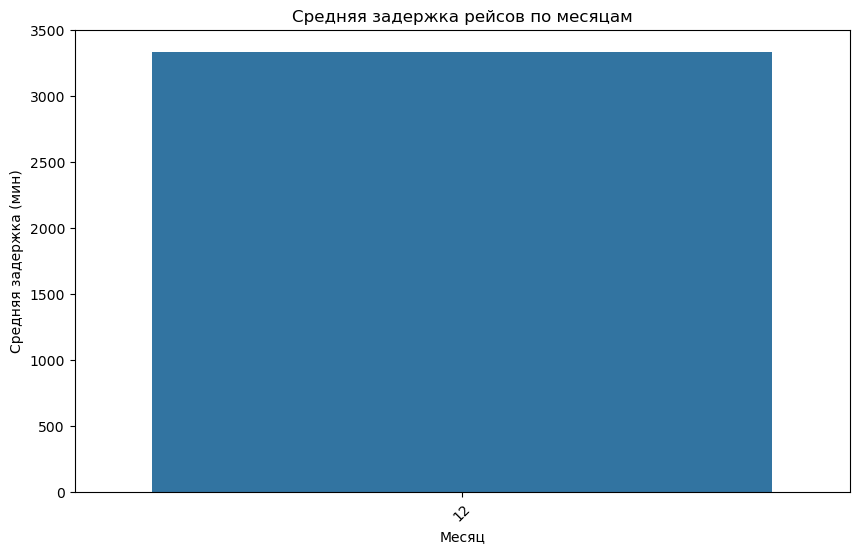

C:\Users\elena.mordvinova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


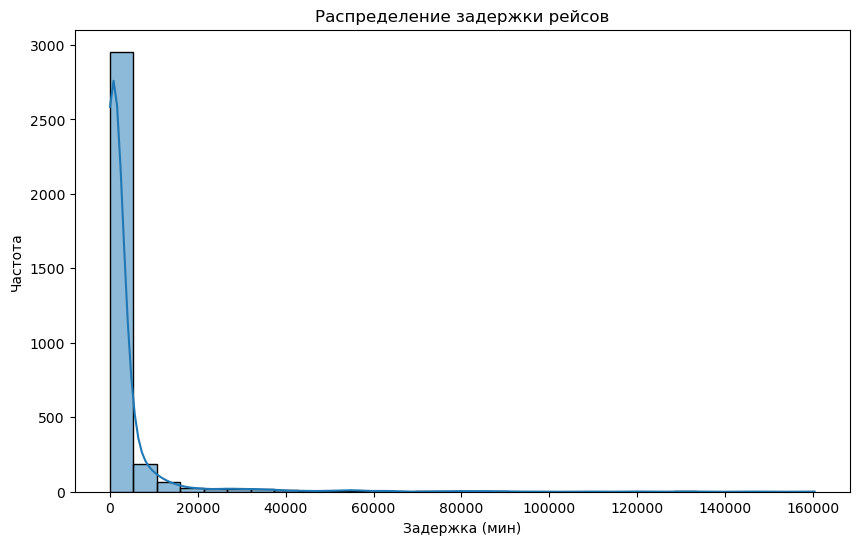

ValueError: Could not interpret value `distance` for parameter `x`

<Figure size 1000x600 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загружаем данные из CSV файла
file_path = r"C:\Users\elena.mordvinova\PYT\L1\1_Airline Delay-задержка рейса .csv"
data = pd.read_csv(file_path)

# Просмотр первых строк данных для понимания структуры
print(data.head())

# 2. Построим столбчатую диаграмму (например, для задержек рейсов по месяцам)
# Используем 'month' и 'arr_delay'
monthly_delays = data.groupby('month')['arr_delay'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='arr_delay', data=monthly_delays)
plt.title('Средняя задержка рейсов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя задержка (мин)')
plt.xticks(rotation=45)
plt.show()

# Комментарий: Указывает на месяцы с наибольшими задержками. Полезно для планирования ресурсов в пиковые сезоны.

# 3. Построим гистограмму распределения числовой переменной (например, 'arr_delay')
plt.figure(figsize=(10, 6))
sns.histplot(data['arr_delay'], bins=30, kde=True)
plt.title('Распределение задержки рейсов')
plt.xlabel('Задержка (мин)')
plt.ylabel('Частота')
plt.show()

# Комментарий: Гистограмма показывает частоту задержек. Широкий хвост указывает на частые значительные задержки.

# 4. Построим точечную диаграмму для двух числовых переменных (например, 'arr_delay' и 'distance')
# Предполагаем, что у нас есть столбец 'distance'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='arr_delay', data=data, alpha=0.5)
plt.title('Задержка рейсов в зависимости от расстояния')
plt.xlabel('Расстояние (миль)')
plt.ylabel('Задержка (мин)')
plt.show()

# Комментарий: Исследует связь между расстоянием и задержкой. Возможна корреляция между данными переменными.

# 5. Построим тепловую карту для двух категориальных переменных (например, 'carrier' и 'month')
heatmap_data = data.groupby(['carrier', 'month']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Количество рейсов по авиакомпаниям и месяцам')
plt.xlabel('Месяц')
plt.ylabel('Авиакомпания')
plt.show()

# Комментарий: Позволяет увидеть, какие авиакомпании наиболее активны в какие месяцы. Полезно для понимания конкурентной среды.